In [225]:
import os 
import string 
import pandas as pd 
import numpy as np
from string import digits 
import matplotlib.pyplot as plt 

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense 
from keras.models import Model 

# Get Dataset

In [226]:
train_data = pd.read_json('DATA/MT_JAVNRF_INZNTV/train_preprocess.json')
test_data = pd.read_json('DATA/MT_JAVNRF_INZNTV/test_preprocess.json')

In [227]:
train_data.drop(columns='id', inplace=True)
test_data.drop(columns='id', inplace=True)

In [228]:
train_data.head()

,text,label
0,"Wong kabèh padha gumun, temah padha takon-tin...","Mereka semua takjub, sehingga mereka memperbin..."
1,"Saka ing tutuké metu pedhang kang landhep, ka...",Dan dari mulut-Nya keluarlah sebilah pedang ta...
2,Déné kowé padha diawas! Aku wus ngandhakake...,Hati-hatilah kamu! Aku sudah terlebih dahulu m...
3,"supaya didhaftaraké bebarengan karo Maria, pa...","supaya didaftarkan bersama-sama dengan Maria, ..."
4,Allah sampun mungokaken Panjenenganipun saking...,Allah telah membangkitkan Dia dari antara oran...


In [229]:
test_data.head()

,text,label
0,"Nalika samana Hérodès, raja-wilayah, midhang...",Pada masa itu sampailah berita-berita tentang ...
1,"""Lan ing salebeting kawontenan ingkang makaten...","""Dan dalam keadaan demikian, ketika aku dengan..."
2,Margi saking punika panjenenganipun uninga sad...,Karena itu ia telah melihat ke depan dan telah...
3,Sih-rahmat nunggila ing kowé kabèh.,Kasih karunia menyertai kamu sekalian.
4,nganggo tanganku dhéwé aku nindakaké pagawe...,kami melakukan pekerjaan tangan yang berat. Ka...


# Data Preprocessing 

In [230]:
import nltk
nltk.download("punkt")
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation

[nltk_data] Downloading package punkt to C:\Users\Kania Galih
[nltk_data]     Widowati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [231]:
javanese_stopwords = pd.read_csv("local_languages_stopwords.csv")
javanese_stopwords.head()

,indonesian,javanese,sundanese
0,ada,Ana,Aya
1,adalah,yaiku,geus
2,adanya,orane,ayana
3,adapun,Kangge,Samentara éta
4,agak,Luwih,rada


In [232]:
#remove sundanese column
javanese_stopwords.drop(columns=["indonesian", "sundanese"], inplace=True)
javanese_stopwords.head()

,javanese
0,Ana
1,yaiku
2,orane
3,Kangge
4,Luwih


In [233]:
javanese_stopwords = javanese_stopwords['javanese'].tolist()
javanese_stopwords

['Ana',
 'yaiku',
 'orane',
 'Kangge',
 'Luwih',
 'Dianggo',
 'dadi ngono',
 'bakal',
 'bakal',
 'pungkasan',
 'pungkasan',
 'Pungkasane',
 'Aku',
 'kula',
 'banget',
 'Banget',
 'Sampeyan',
 'Sampeyan',
 'antarane',
 'antarane',
 'Antarane wong-wong mau',
 'Apa',
 'Apa',
 'Yen',
 'yaiku',
 'utamane',
 'Akatah',
 'Tegese',
 'Asal',
 'diwenehake',
 'ing',
 'utawa',
 'utawa iku',
 'utawa',
 'diwiwiti',
 'Wiwitane',
 'kaya',
 'kaya',
 'Kepiye',
 'Kepiye',
 'Nanging',
 'kanggo',
 'bagean',
 'Malah',
 'iku',
 'iku',
 'Apik',
 'bakal',
 'arep',
 'teka maneh',
 'Akeh',
 'Rama',
 'Anyar',
 'ngisor',
 'nomer saka',
 'Katon',
 'iki',
 'Kajaba iku',
 'Iki carane',
 'dadi',
 'Kajaba iku',
 'Iku iku',
 'Kajaba iku',
 'Nyambut gawe',
 'konco',
 'Mengko',
 'Durung',
 'durung',
 'Bener',
 'Iku bener',
 'Bener',
 'ana ing',
 'pungkasan',
 'pungkasan',
 'rampung',
 'Wonten pinten',
 'Apa',
 'Apa sing sampeyan lakoni',
 'apa wae',
 'Tegese',
 'Miwiti',
 'Macem-macem',
 'Tiba',
 'Menehi',
 'menehi',
 'Dip

In [234]:
nltk.download('stopwords', quiet=True)
indonesian_stopwords = stopwords.words('indonesian')

In [235]:
indonesian_stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [236]:
def preprocess_text(text, language_label):
    #lowercase
    text = text.lower()
    #remove quotes
    text = text.strip('"')
    # Combine removing special characters, punctuation, and extra whitespace
    text = re.sub(r"[^\w\s]", "", text)  # Removes special characters
    text = "".join([char for char in text if char not in punctuation])  # Removes punctuation
    text = " ".join(text.split())  # Removes extra whitespace
    #Tokenize 
    tokens = word_tokenize(text)

    # Select stopwords based on language label
    if language_label == "label":
        stopwords = indonesian_stopwords
    elif language_label == "text":
        stopwords = javanese_stopwords
    else:
        # Default to empty set if language label is not recognized
        stopwords = set()

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords]
    

    # Join the tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text


In [237]:
train_data['label'] = train_data['label'].apply(lambda x: preprocess_text(x, indonesian_stopwords))
train_data['text'] = train_data['text'].apply(lambda x: preprocess_text(x, javanese_stopwords))

In [238]:
test_data['label'] = test_data['label'].apply(lambda x: preprocess_text(x, indonesian_stopwords))
test_data['text'] = test_data['text'].apply(lambda x: preprocess_text(x, javanese_stopwords))

In [239]:
train_data.head()

,text,label
0,wong kabeh padha gumun temah padha takontinako...,mereka semua takjub sehingga mereka memperbinc...
1,saka ing tutuke metu pedhang kang landhep kang...,dan dari mulutnya keluarlah sebilah pedang taj...
2,dene kowe padha diawas aku wus ngandhakake iki...,hatihatilah kamu aku sudah terlebih dahulu men...
3,supaya didhaftarake bebarengan karo maria paca...,supaya didaftarkan bersamasama dengan maria tu...
4,allah sampun mungokaken panjenenganipun saking...,allah telah membangkitkan dia dari antara oran...


In [240]:
train_data.isnull().sum()

text     0
label    0
dtype: int64

# Get Vocab 

In [241]:
# Add start and end tokens to target sequences
train_data['text'] = train_data['text'].apply(lambda x : 'START_ '+ x + ' _END')
test_data['text'] = test_data['text'].apply(lambda x : 'START_ '+ x + ' _END')

In [242]:
train_data.head()

,text,label
0,START_ wong kabeh padha gumun temah padha tako...,mereka semua takjub sehingga mereka memperbinc...
1,START_ saka ing tutuke metu pedhang kang landh...,dan dari mulutnya keluarlah sebilah pedang taj...
2,START_ dene kowe padha diawas aku wus ngandhak...,hatihatilah kamu aku sudah terlebih dahulu men...
3,START_ supaya didhaftarake bebarengan karo mar...,supaya didaftarkan bersamasama dengan maria tu...
4,START_ allah sampun mungokaken panjenenganipun...,allah telah membangkitkan dia dari antara oran...


In [243]:
test_data.head()

,text,label
0,START_ nalika samana herodes rajawilayah midha...,pada masa itu sampailah beritaberita tentang y...
1,START_ lan ing salebeting kawontenan ingkang m...,dan dalam keadaan demikian ketika aku dengan k...
2,START_ margi saking punika panjenenganipun uni...,karena itu ia telah melihat ke depan dan telah...
3,START_ sihrahmat nunggila ing kowe kabeh _END,kasih karunia menyertai kamu sekalian
4,START_ nganggo tanganku dhewe aku nindakake pa...,kami melakukan pekerjaan tangan yang berat kal...


In [244]:
all_ind_words=set()
for ind in train_data['label']:
    for word in ind.split():
        if word not in all_ind_words:
            all_ind_words.add(word)

all_javanese_words=set()
for jav in train_data['text']:
    for word in jav.split():
        if word not in all_javanese_words:
            all_javanese_words.add(word)

In [245]:
len(all_ind_words)

6758

In [246]:
len(all_javanese_words)

9575

In [247]:
train_data['length_jav_sentence']=train_data['text'].apply(lambda x:len(x.split(" ")))
train_data['length_ind_sentence']=train_data['label'].apply(lambda x:len(x.split(" ")))

In [248]:
test_data['length_jav_sentence']=test_data['text'].apply(lambda x:len(x.split(" ")))
test_data['length_ind_sentence']=test_data['label'].apply(lambda x:len(x.split(" ")))

In [249]:
train_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ wong kabeh padha gumun temah padha tako...,mereka semua takjub sehingga mereka memperbinc...,31,24
1,START_ saka ing tutuke metu pedhang kang landh...,dan dari mulutnya keluarlah sebilah pedang taj...,36,34
2,START_ dene kowe padha diawas aku wus ngandhak...,hatihatilah kamu aku sudah terlebih dahulu men...,14,11
3,START_ supaya didhaftarake bebarengan karo mar...,supaya didaftarkan bersamasama dengan maria tu...,11,9
4,START_ allah sampun mungokaken panjenenganipun...,allah telah membangkitkan dia dari antara oran...,42,39


In [250]:
test_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ nalika samana herodes rajawilayah midha...,pada masa itu sampailah beritaberita tentang y...,10,11
1,START_ lan ing salebeting kawontenan ingkang m...,dan dalam keadaan demikian ketika aku dengan k...,23,19
2,START_ margi saking punika panjenenganipun uni...,karena itu ia telah melihat ke depan dan telah...,34,31
3,START_ sihrahmat nunggila ing kowe kabeh _END,kasih karunia menyertai kamu sekalian,7,5
4,START_ nganggo tanganku dhewe aku nindakake pa...,kami melakukan pekerjaan tangan yang berat kal...,23,16


In [251]:
# Max length = 20
train_data=train_data[train_data['length_ind_sentence']<=20]
train_data=train_data[train_data['length_jav_sentence']<=20]

In [252]:
# Max length = 20
test_data=test_data[test_data['length_ind_sentence']<=20]
test_data=test_data[test_data['length_jav_sentence']<=20]

In [253]:
#Check Max Length 
print("maximum length Javanese Sentence ",max(train_data['length_jav_sentence']))
print("maximum length Indonesian Sentence ",max(train_data['length_ind_sentence']))

maximum length Javanese Sentence  20
maximum length Indonesian Sentence  20


In [254]:
#Check Max Length 
print("maximum length Javanese Sentence ",max(test_data['length_jav_sentence']))
print("maximum length Indonesian Sentence ",max(test_data['length_ind_sentence']))

maximum length Javanese Sentence  20
maximum length Indonesian Sentence  20


In [255]:
max_length_src=max(train_data['length_jav_sentence'])
max_length_tar=max(train_data['length_ind_sentence'])

In [256]:
max_length_src_test=max(test_data['length_jav_sentence'])
max_length_tar_test=max(test_data['length_ind_sentence'])

In [257]:
input_words = sorted(list(all_ind_words))
target_words = sorted(list(all_javanese_words))
num_encoder_tokens = len(all_ind_words)
num_decoder_tokens = len(all_javanese_words)
num_encoder_tokens, num_decoder_tokens

(6758, 9575)

In [258]:
num_decoder_tokens += 1 #for zero padding

In [259]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [260]:
input_token_index

{'abadi': 1,
 'abadon': 2,
 'abaikan': 3,
 'abba': 4,
 'abia': 5,
 'abihud': 6,
 'abilene': 7,
 'abraham': 8,
 'abu': 9,
 'abyatar': 10,
 'ada': 11,
 'adakah': 12,
 'adalah': 13,
 'adam': 14,
 'adanya': 15,
 'adapun': 16,
 'adat': 17,
 'adi': 18,
 'adikmu': 19,
 'adiknya': 20,
 'adil': 21,
 'adilkah': 22,
 'adilnya': 23,
 'admin': 24,
 'adonan': 25,
 'adramitium': 26,
 'agabus': 27,
 'agak': 28,
 'agaknya': 29,
 'agama': 30,
 'agamamu': 31,
 'agar': 32,
 'agripa': 33,
 'agung': 34,
 'agustus': 35,
 'ahas': 36,
 'ahli': 37,
 'ahliahli': 38,
 'aib': 39,
 'aibku': 40,
 'ainon': 41,
 'air': 42,
 'airnya': 43,
 'ajaib': 44,
 'ajakan': 45,
 'ajar': 46,
 'ajaran': 47,
 'ajaranajaran': 48,
 'ajaranku': 49,
 'ajaranmu': 50,
 'ajarannya': 51,
 'ajari': 52,
 'ajarkan': 53,
 'ajarkanlah': 54,
 'ajarlah': 55,
 'akal': 56,
 'akan': 57,
 'akar': 58,
 'akarakarnya': 59,
 'akhaikus': 60,
 'akhaya': 61,
 'akhir': 62,
 'akhirnya': 63,
 'akibat': 64,
 'akibatnya': 65,
 'akil': 66,
 'aku': 67,
 'akui': 68,

In [261]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [262]:
train_data = shuffle(train_data)
train_data.head()

,text,label,length_jav_sentence,length_ind_sentence
2442,START_ marga kita yakin yen manungsa iku anggo...,karena kami yakin bahwa manusia dibenarkan kar...,20,15
1480,START_ kowe uga sing waspada marang wong iku a...,hendaklah engkau juga waspada terhadap dia kar...,15,12
1642,START_ rahayu wong kang kaluwen lan ngelak mar...,berbahagialah orang yang lapar dan haus akan k...,17,12
3547,START_ kang jumeneng imam ora alandhesan prana...,yang menjadi imam bukan berdasarkan peraturanp...,17,14
4957,START_ bab iki paseksine wongwong iku uga ceng...,dalam hal ini pun kesaksian mereka tidak sesua...,11,13


In [263]:
test_data = shuffle(test_data)
test_data.head()

,text,label,length_jav_sentence,length_ind_sentence
279,START_ yesus tumuli mlebet ing sawijining omah...,kemudian yesus masuk ke sebuah rumah maka data...,20,18
395,START_ pangandikane pangeran banjur kawartakak...,lalu firman tuhan disiarkan di seluruh daerah itu,10,8
734,START_ dene pilatus nanggapi wong akeh kalawan...,pilatus menjawab mereka dan bertanya apakah ka...,20,14
131,START_ supaya wekasane aku oleh patangen saka ...,supaya aku akhirnya beroleh kebangkitan dari a...,12,9
72,START_ herodes banjur nimbali para pandhita ma...,lalu dengan diamdiam herodes memanggil orangor...,18,18


In [264]:
# Combine the DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

In [265]:
combined_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ marga kita yakin yen manungsa iku anggo...,karena kami yakin bahwa manusia dibenarkan kar...,20,15
1,START_ kowe uga sing waspada marang wong iku a...,hendaklah engkau juga waspada terhadap dia kar...,15,12
2,START_ rahayu wong kang kaluwen lan ngelak mar...,berbahagialah orang yang lapar dan haus akan k...,17,12
3,START_ kang jumeneng imam ora alandhesan prana...,yang menjadi imam bukan berdasarkan peraturanp...,17,14
4,START_ bab iki paseksine wongwong iku uga ceng...,dalam hal ini pun kesaksian mereka tidak sesua...,11,13


# Tokenizer

In [266]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

# prepare english tokenizer
java_tokenizer = tokenization(combined_data.text)
java_vocab_size = len(java_tokenizer.word_index) + 1

java_length = 20
print('Java Vocabulary Size: %d' % java_vocab_size)

# prepare indo tokenizer
indo_tokenizer = tokenization(combined_data.label)
indo_vocab_size = len(indo_tokenizer.word_index) + 1

indo_length = 20
print('indo Vocabulary Size: %d' % indo_vocab_size)

Java Vocabulary Size: 5331
indo Vocabulary Size: 4077


In [267]:
print(java_tokenizer.texts_to_sequences(combined_data.text[:1]))
print(java_tokenizer.texts_to_sequences(combined_data.text[1:2]))

[[1, 42, 29, 1252, 52, 73, 5, 55, 377, 46, 18, 58, 12, 42, 18, 55, 328, 173, 128, 2]]
[[1, 10, 47, 82, 1694, 9, 8, 5, 46, 97, 55, 329, 412, 29, 2]]


In [268]:
X = encode_sequences(java_tokenizer, 20, combined_data.text)
y = encode_sequences(indo_tokenizer, 20, combined_data.label)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((2196, 20), (550, 20))

In [270]:
X_train[0:2]

array([[   1,   51,   19,  912,  157,   34,    4,   12,   58,    9,   14,
           2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,   13,    4,  507,   28, 4594,   29,  184,    4,  466,  468,
          53,   29,   26,    4,  105,   79,   18,  235,    2]])

In [271]:
y_train[0]

array([ 24, 609,  66,  53,   9,  88,  37,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

# Save data to PKL 

In [272]:
# X_train.to_pickle('X_train.pkl')
# X_test.to_pickle('X_test.pkl')

In [273]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# Encoder Decoder 

In [274]:
latent_dim=300

In [275]:
# Encoder
encoder_inputs = Input(shape=[20])
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

encoder_states = [state_h, state_c]

In [276]:
encoder_outputs

<KerasTensor shape=(None, 300), dtype=float32, sparse=False, name=keras_tensor_74>

In [277]:
decoder_inputs = Input(shape=[20])
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(indo_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [278]:
model.compile(optimizer='AdamW', loss='sparse_categorical_crossentropy')

In [279]:
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_15      │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 20, 300)   │  2,027,400 │ input_layer_14[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_10        │ (None, 20)        │          0 │ input_layer_14[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 20, 300)   │  2,872,800 │ input_layer_15[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ [(None, 300),     │    721,200 │ embedding_6[0][0… │
│                     │ (None, 300),      │            │ not_equal_10[0][… │
│                     │ (None, 300)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ [(None, 20, 300), │    721,200 │ embedding_7[0][0… │
│                     │ (None, 300),      │            │ lstm_6[0][1],     │
│                     │ (None, 300)]      │            │ lstm_6[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 20, 4077)  │  1,227,177 │ lstm_7[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,569,777 (28.88 MB)

 Trainable params: 7,569,777 (28.88 MB)

 Non-trainable params: 0 (0.00 B)

In [280]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 200

In [281]:
X_train.shape

(2196, 20)

In [282]:
X_test.shape

(550, 20)

In [283]:
y_train.shape

(2196, 20)

In [284]:
history = model.fit(
    [X_train, y_train.reshape(y_train.shape[0], y_train.shape[1], 1)], y_train.reshape(y_train.shape[0], y_train.shape[1], 1),
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - loss: 8.1403 - val_loss: 6.5812
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - loss: 6.4904 - val_loss: 6.6150
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 429ms/step - loss: 6.3113 - val_loss: 6.3537
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 428ms/step - loss: 6.0169 - val_loss: 5.9184
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 472ms/step - loss: 5.5961 - val_loss: 5.5477
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - loss: 5.2495 - val_loss: 5.2174
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 442ms/step - loss: 4.8941 - val_loss: 4.8812
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step - loss: 4.5314 - val_loss: 4.5728
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 402ms/step - loss: 4.2003 - val_loss: 4.3023
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 400ms/step - loss: 3.9316 - val_loss: 4.0563
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - loss: 3.6502 - val_loss: 3.8282
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 

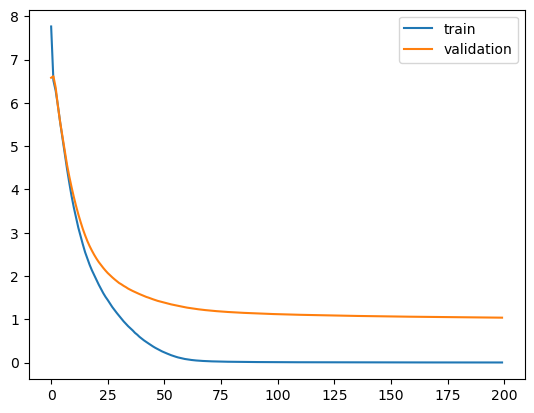

In [292]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [299]:
model.save('model_lstm.keras')

In [293]:
preds = model.predict([X_test, y_test.reshape(y_test.shape[0], y_test.shape[1], 1)])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


# Model Inference 

In [294]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [295]:
def decode_sequences(tokenizer, sequences):
    decoded_texts = []
    for sequence in sequences:
        decoded_words = []
        for int_val in sequence:
            word = get_word(int_val, tokenizer)
            if word is not None:
                decoded_words.append(word)
        decoded_texts.append(' '.join(decoded_words))
    return decoded_texts

In [296]:
preds_text = []

for i, pred in enumerate(preds):
    temp = []
    for j, token_probs in enumerate(pred):
        predicted_word_index = np.argmax(token_probs)
        t = get_word(predicted_word_index, indo_tokenizer)
        if j > 0:
            if (t == get_word(np.argmax(pred[j-1]), indo_tokenizer)) or (t is None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if t is None:
                temp.append('')
            else:
                temp.append(t) 

    preds_text.append(' '.join(temp))

In [297]:
decoded_texts = decode_sequences(indo_tokenizer,y_test)
decoded_texts

['sebab anak manusia memang akan pergi seperti yang telah ditetapkan akan tetapi celakalah orang yang olehnya ia diserahkan',
 'lalu tersungkur di depan kaki yesus dan mengucap syukur kepadanya orang itu adalah seorang samaria',
 'dan matilah sepertiga dari segala makhluk yang bernyawa di dalam laut dan binasalah sepertiga dari semua kapal',
 'dan mereka akan melihat wajahnya dan namanya akan tertulis di dahi mereka',
 'karena setiap orang akan digarami dengan api',
 'yaitu rahasia yang tersembunyi dari abad ke abad dan dari turunan ke turunan tetapi yang sekarang dinyatakan kepada orangorang kudusnya',
 'yesus menjawab mereka percayalah kepada allah',
 'dan ia menyangkalnya pula dengan bersumpah aku tidak kenal orang itu',
 'tetapi mereka keluar dan memasyhurkan dia ke seluruh daerah itu',
 'salam kepada maria yang telah bekerja keras untuk kamu',
 'lima kali aku disesah orang yahudi setiap kali empat puluh kurang satu pukulan',
 'tetapi tuhan menjawabnya marta marta engkau kuatir dan

In [298]:
for pred, actual in zip(preds_text, decoded_texts):
    print("Predicted:", pred)
    print("Actual:", actual)
    print()  # Print a blank line for better readability

Predicted: sebab anak manusia memang akan pergi seperti yang telah ditetapkan akan tetapi celakalah orang yang olehnya ia diserahkan didimus binatang
Actual: sebab anak manusia memang akan pergi seperti yang telah ditetapkan akan tetapi celakalah orang yang olehnya ia diserahkan

Predicted: lalu tersungkur di depan kaki yesus dan mengucap syukur kepadanya orang itu adalah seorang samaria dan    
Actual: lalu tersungkur di depan kaki yesus dan mengucap syukur kepadanya orang itu adalah seorang samaria

Predicted: dan sembuhkanlah bersorak dari segala makhluk yang mendirikan di dalam laut dan   dari semua kapal bitinia dan 
Actual: dan matilah sepertiga dari segala makhluk yang bernyawa di dalam laut dan binasalah sepertiga dari semua kapal

Predicted: dan mereka akan melihat wajahnya dan namanya akan tertulis di miletus mereka samasama yang dan     
Actual: dan mereka akan melihat wajahnya dan namanya akan tertulis di dahi mereka

Predicted: karena setiap orang akan adanya dengan api me